### Objective
-	Use the model that was fit to obtain the accuracy score, check for overfitting/underfitting and compare it to a dummy baseline model.
-	Use the fitted model to obtain the confusion matrix and the classification report and understand the various metrics that can be derived from it.



In [103]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plt

##### 1. Load the dataset that was cleaned (from the data directory) and see if it requires any more cleaning after reading it (hint: Check the first column). Feed the train data into a Logistic Regression model with an arbitrary random state. 
* Feel free to play around with the parameters of the LogisticRegression class.

In [2]:
# Read cleaned data training, test, labels
X_train = pd.read_pickle("X_train.pkl")
X_test  = pd.read_pickle("X_test.pkl")
y_train = pd.read_pickle("y_train.pkl")
y_test  = pd.read_pickle("y_test.pkl")

In [4]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW'],
      dtype='object', length=117)

In [5]:
X_train['MinTemp'].describe()

count    113754.000000
mean          0.484406
std           0.151741
min           0.000000
25%           0.375297
50%           0.479810
75%           0.593824
max           1.000000
Name: MinTemp, dtype: float64

Not seeing any irregularities in the first column

**Logistic Regression**

In [10]:
# Create Logistic Regression - Rain Prediction
log_regression = LogisticRegression(solver='liblinear', random_state=0)

In [11]:
# Train the model
log_regression.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

##### Obtain the accuracy of both the train set and the test set.
* Compare the two accuracies and observe if there are any signs of underfitting/overfitting.
* Create two dummy baseline models, i.e., models in which the labels are all ‘Yes’ or all ‘No’.
* Obtain the accuracy of these two models and compare it to the Rain Prediction model.


In [14]:
# Predict using test data
y_prediction_test = log_regression.predict(X_test)

In [15]:
test_accuracy_score  = accuracy_score(y_test, y_prediction_test)
print(f"Accuracy Score is for test data is :{test_accuracy_score*100:.2f}%")

Accuracy Score is for test data is :84.80%


In [18]:
# Predict using train data
y_prediction_train = log_regression.predict(X_train)

In [20]:
train_accuracy_score  = accuracy_score(y_train, y_prediction_train)
print(f"Accuracy Score is for train data is :{train_accuracy_score*100:.2f}%")

Accuracy Score is for train data is :84.78%


Accuracy scores for both test data and train data seemed to be very similar. No indication of overfitting can be found.

Creating two dummy baseline models by making the y variable all yes(1) or all no(0)

In [26]:
# Create all yes models
# Read cleaned data training, test, labels
X_train_yes = X_train.copy()
X_test_yes  = X_test.copy()
y_train_yes = y_train.copy()
y_test_yes  = y_test.copy()

In [36]:
# Switch values to all yes in y_train and y_test label sets
y_train_yes.replace(0,1, inplace=True)
y_test_yes.replace(0,1, inplace=True)

In [41]:
# Confirm all values are 1
print(y_train_yes.value_counts())
print(y_test_yes.value_counts())

1    113754
Name: RainTomorrow, dtype: int64
1    28439
Name: RainTomorrow, dtype: int64


In [42]:
# Create logistic regression with new data 
# Create Logistic Regression - Rain Prediction
log_regression_yes = LogisticRegression(solver='liblinear', random_state=0)
# Train the model
log_regression_yes.fit(X_train_yes, y_train_yes)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

##### 2.Obtain the confusion matrix and the classification report for the model.
* Understand the difference between the four splits of the data in the confusion matrix, and research about the different metrics that can be obtained using this matrix - precision, recall, f1-score, specificity, true positive rate and false positive rate.
* Likewise, understand the values of the metrics obtained from the classification report.


In [46]:
confusion_m = confusion_matrix(y_test,y_prediction_test)
confusion_m

array([[21181,   886],
       [ 3437,  2935]])

In [87]:
# Obtain tp, fp, fn, tp
TN, FP, FN, TP = confusion_matrix(y_test,y_prediction_test).ravel()

In [88]:
# Print the four pieces of the confusion matrix
print(f"True Positive (TP):{TP:,}")
print(f"True Negative (TN):{TN:,}")
print(f"False Positive (FP):{FP:,}")
print(f"False Negative (FN):{FN:,}")

True Positive (TP):2,935
True Negative (TN):21,181
False Positive (FP):886
False Negative (FN):3,437


In [89]:
# Create dataframe to create graph
cm_dict={'Actual Positive':[TP,FN],'Actual Negative':[FP,TN]}
df_confusion_m = pd.DataFrame(data=cm_dict, columns=["Actual Positive", "Actual Negative"], index=["Predictive Positive","Predictive Negative"])

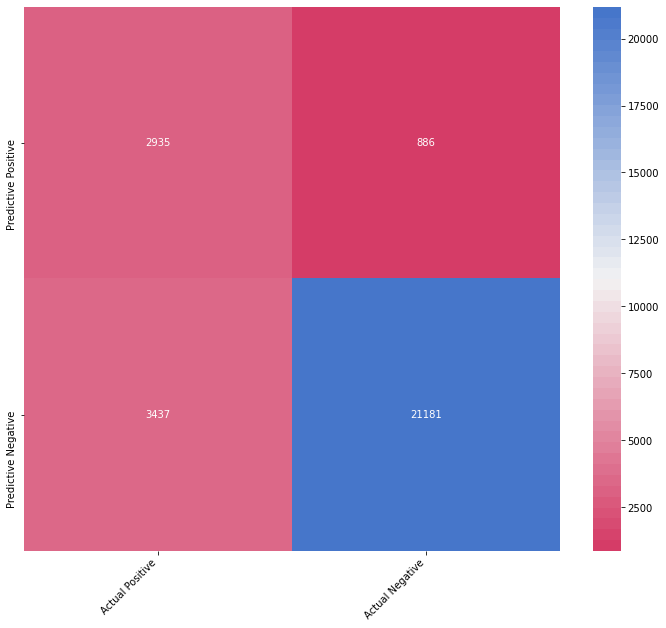

In [91]:
# Display correlation heatmap
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(
    df_confusion_m,
    annot=True,
    fmt='d',
    cmap=sns.diverging_palette(1, 255, n=50),
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [72]:
# Show classification report showing precicion, recall, f1-score, support
print(classification_report(y_test,y_prediction_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     22067
           1       0.77      0.46      0.58      6372

    accuracy                           0.85     28439
   macro avg       0.81      0.71      0.74     28439
weighted avg       0.84      0.85      0.83     28439



In [123]:
# Accuracy
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy

0.8495727697879673

In [95]:
# Display precision, recall, fscore from function
precision_recall_fscore_support(y_test,y_prediction_test, average='binary')

(0.7681235278722848, 0.4606089139987445, 0.5758854115569508, None)

In [96]:
# Calculate manually
# Precision calculation TP/(TP+FP)
precision = TP/(TP+FP)
precision

0.7681235278722848

In [97]:
# Calculate manually
# Recall (true positive rate) calculation TP/(TP+FN)
recall = TP/(TP+FN)
recall

0.4606089139987445

In [99]:
# Calculate manually
# false positive rate calculation FP/(FP+TN)
false_PR = FP/(FP+TN)
false_PR

0.04015045089953324

In [98]:
# Calculate manually
# F1 calculation 2*TP/(2*TP+FP+FN)
recall = 2*TP/(2*TP+FP+FN)
recall

0.5758854115569508

In [100]:
# Calculate manually
#specifity calculation TN / (TN + FP)
specifity = TN / (TN + FP)
specifity

0.9598495491004667

##### 3 By default, the split between “Yes” and “No” occurs at a probability of 0.5. Try changing this threshold to a value in which Type 2 error decreases (which would increase type 1 error as a trade-off)
* Try to understand why one would need to alter these threshold values, and its implications on the model.


In [114]:
# Probability of no rain(0) and rain(1) for the first 10 records
# With a threshold of 0.5, any value with greater than 0.5 indicates yes, it will rain
log_regression.predict_proba(X_test)[0:10]

array([[0.92399234, 0.07600766],
       [0.87930385, 0.12069615],
       [0.86377416, 0.13622584],
       [0.99220862, 0.00779138],
       [0.96884661, 0.03115339],
       [0.98314454, 0.01685546],
       [0.21806678, 0.78193322],
       [0.25971709, 0.74028291],
       [0.92669556, 0.07330444],
       [0.88934784, 0.11065216]])

 * Type 1 error = False Positives - Predicted Rain, Actual no rain
 * Type 2 Error = False Negatives - Predicted No Rain, Actual rain

In [130]:
# Generate thresholds 0.1 to 0.9 and calculate confusion matrix
for i in range(1,10):
    # Predict original probability of rain (column 1)
    y_rain_prediction = log_regression.predict_proba(X_test)[:,1]    
    # Reshape to pass to binarize function
    y_rain_prediction = y_rain_prediction.reshape(-1,1)
    new_threshold = i/10
    print(f"\nThreshold:{new_threshold}")
    y_new_rain_prediction = binarize(y_rain_prediction,threshold=new_threshold)
    new_confusion_m = confusion_matrix(y_test,y_new_rain_prediction)    
    # Obtain tp, fp, fn, tp
    TN, FP, FN, TP = new_confusion_m.ravel()
    print(f"False Positives (Type I errors):{FP:,}")
    print(f"False Negatives (Type II errors):{FN:,}")
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    print(f"Accuracy:{accuracy*100:.2f}%")
    print(f"Precision:{precision*100:.2f}%")
    print(f"Recall:{recall*100:.2f}%")


Threshold:0.1
False Positives (Type I errors):7,857
False Negatives (Type II errors):712
Accuracy:69.87%
Precision:41.87%
Recall:88.83%

Threshold:0.2
False Positives (Type I errors):3,990
False Negatives (Type II errors):1,521
Accuracy:80.62%
Precision:54.87%
Recall:76.13%

Threshold:0.3
False Positives (Type I errors):2,315
False Negatives (Type II errors):2,247
Accuracy:83.96%
Precision:64.05%
Recall:64.74%

Threshold:0.4
False Positives (Type I errors):1,426
False Negatives (Type II errors):2,852
Accuracy:84.96%
Precision:71.17%
Recall:55.24%

Threshold:0.5
False Positives (Type I errors):886
False Negatives (Type II errors):3,437
Accuracy:84.80%
Precision:76.81%
Recall:46.06%

Threshold:0.6
False Positives (Type I errors):502
False Negatives (Type II errors):4,029
Accuracy:84.07%
Precision:82.36%
Recall:36.77%

Threshold:0.7
False Positives (Type I errors):258
False Negatives (Type II errors):4,611
Accuracy:82.88%
Precision:87.22%
Recall:27.64%

Threshold:0.8
False Positives (Typ